    1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
    2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = sns.load_dataset('titanic')

In [21]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [22]:
df.shape

(891, 15)

In [23]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [25]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [26]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
df['age'].fillna(df['age'].mean(),inplace = True)
df = df.drop(['deck'],axis = 1)
df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace = True)

In [28]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

/home/pict/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare'>

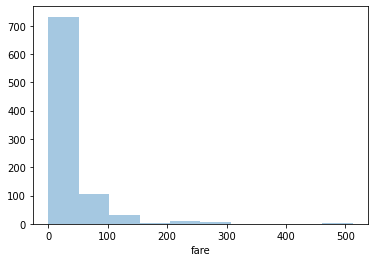

In [29]:
sns.distplot(df['fare'], kde=False,bins=10)

We can clearly see that for more than 700 passengers, the ticket price is between 0 and 50

<AxesSubplot:xlabel='age'>

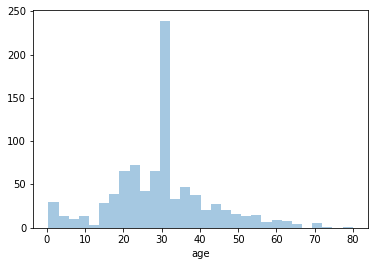

In [30]:
sns.distplot(df['age'],kde=False)

We can clearly see that most of the people are aged between 20 and 40

<AxesSubplot:xlabel='age', ylabel='fare'>

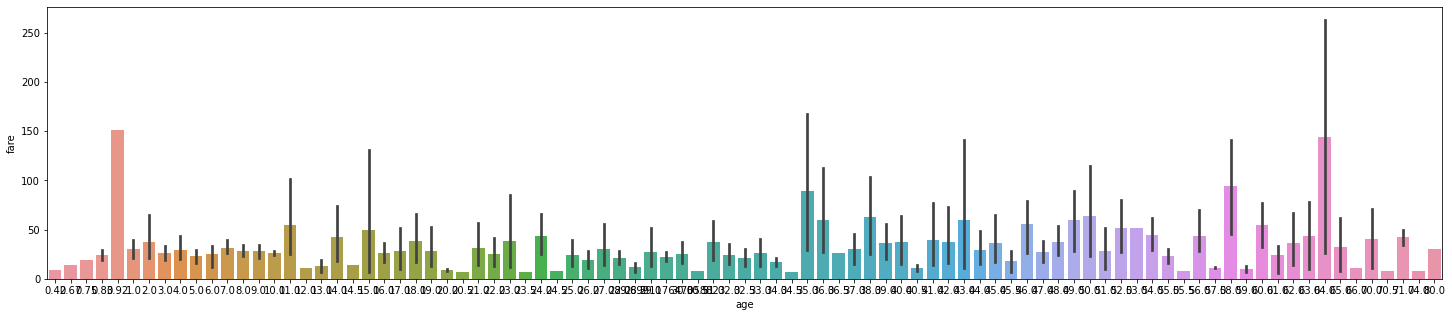

In [56]:
plt.figure(figsize=(25,5))
sns.barplot(x='age',y='fare',data=df)

Barplot is distributed along age and fare

<AxesSubplot:xlabel='age', ylabel='fare'>

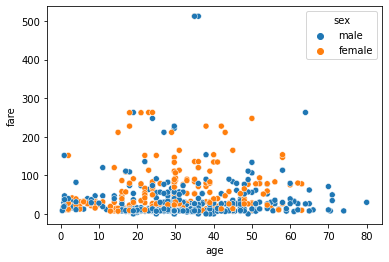

In [32]:
sns.scatterplot(data=df,x='age',y='fare',hue='sex')

We can clearly see that most of the data is distributed along 0 to 100 fare prices

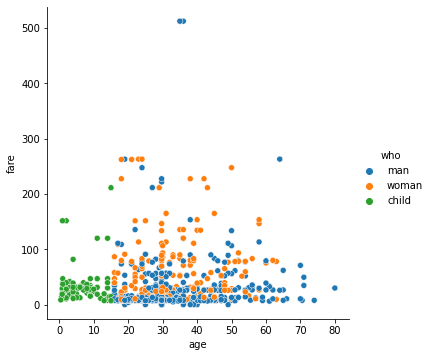

In [33]:
sns.pairplot(data=df,x_vars='age',y_vars='fare',hue='who',height=5)

We can clearly see that distribution among man woman and child and the lesser one is of child.

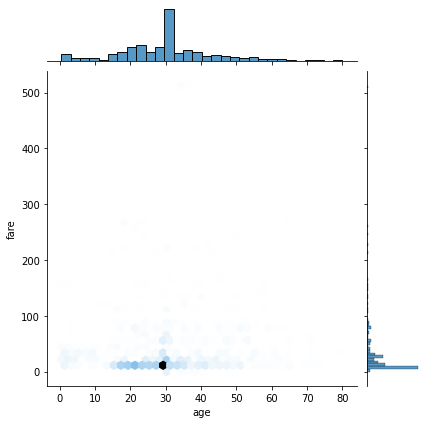

In [34]:
sns.jointplot(x='age', y='fare', data=df, kind='hex')

Joint plot has three parts. A distribution plot at the top for the column on the x-axis, a distribution plot on the right for the column on the y-axis and a scatter plot in between that shows the mutual distribution of data for both the columns.We can see that most of the passengers of age 30 and most of them paid between 10-50 for the tickets.

<AxesSubplot:xlabel='fare'>

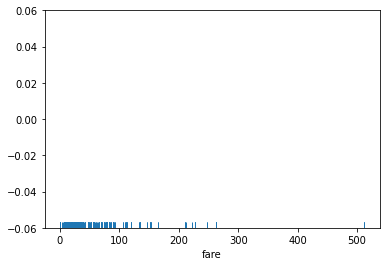

In [35]:
sns.rugplot(df['fare'])

most of the instances for the fares have values between 0 and 100.



<AxesSubplot:xlabel='sex', ylabel='age'>

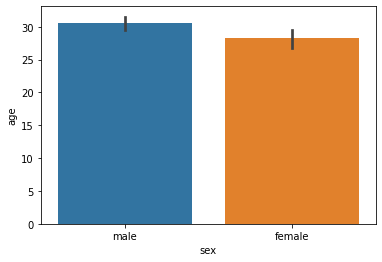

In [36]:
sns.barplot(x='sex', y='age', data=df)

We can clearly see that the average age of male passengers is just around 30 while the average age of female passengers is around 27

<AxesSubplot:xlabel='sex', ylabel='age'>

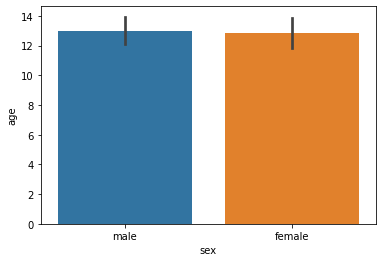

In [37]:
sns.barplot(x='sex', y='age', data=df, estimator=np.std)

We can clearly see that Y axis is of standard-deviation range of age

<AxesSubplot:xlabel='sex', ylabel='count'>

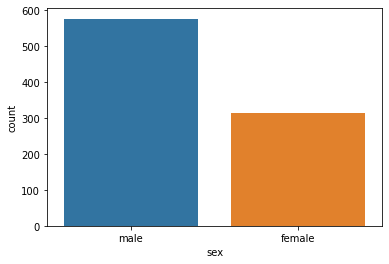

In [38]:
sns.countplot(x='sex', data=df)

It is similar to the bar plot, It displays the count of the categories in a specific column. female count is about 300 and male count is about 550

<AxesSubplot:xlabel='sex', ylabel='count'>

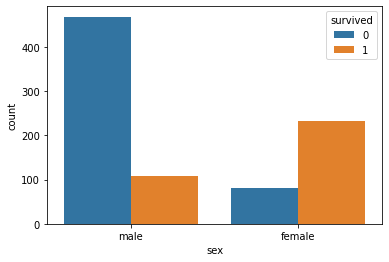

In [39]:
sns.countplot(x='sex', data=df, hue='survived')

we can clearly see that survived male count is almost 100 and survived female count is 200.

<AxesSubplot:xlabel='sex', ylabel='age'>

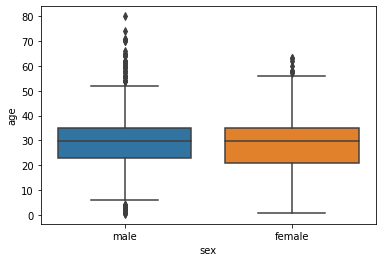

In [40]:
sns.boxplot(x='sex', y='age', data=df)

We can see outliers present in the box plot.The middle line is median of the dataset.

<AxesSubplot:xlabel='sex', ylabel='age'>

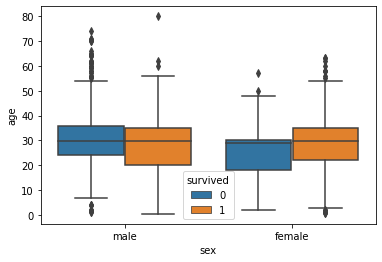

In [41]:
sns.boxplot(x='sex', y='age', data=df,hue="survived")

We have classified using survived and non survived people among man and woman.

<AxesSubplot:xlabel='sex', ylabel='age'>

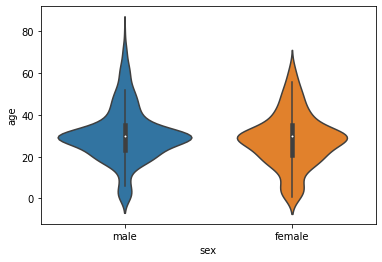

In [42]:
sns.violinplot(x='sex', y='age', data=df)

The area where the violin plot is thicker has a higher number of instances for the age. Violin plot for males, number of passengers with age between 20 and 40 is higher than all the rest of thre age brackets

<AxesSubplot:xlabel='sex', ylabel='age'>

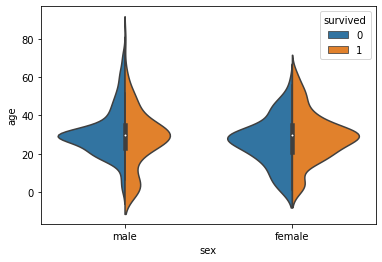

In [43]:
sns.violinplot(x='sex', y='age', data=df, hue='survived', split=True)

We have distibuted according to survived man and woman

/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

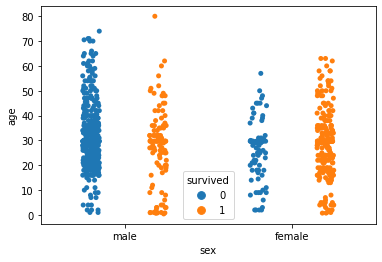

In [44]:
sns.stripplot(x='sex', y='age', data=df, jitter=True, hue='survived',split=True)

/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decre

<AxesSubplot:xlabel='sex', ylabel='age'>

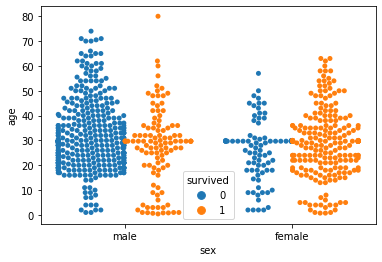

In [45]:
sns.swarmplot(x='sex',y='age',data=df,hue='survived',split=True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

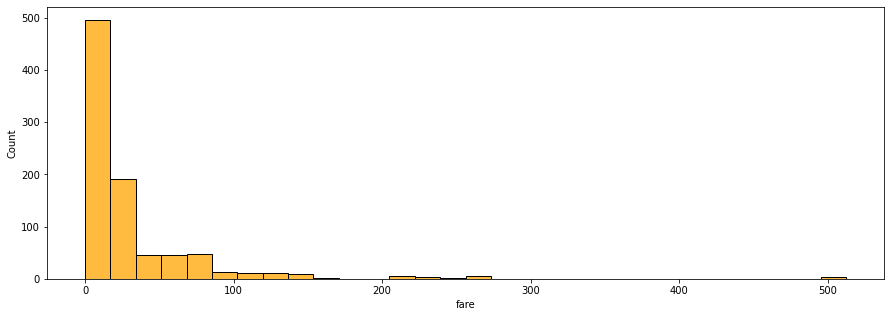

In [60]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='fare',color='orange',bins=30)

Most of the paasengers are largely distributed in 0-100 price